# Exploring HGCal

Let's take a look at some hgcal data.  First some simple visualizations...

In [6]:
#imports and setup
%matplotlib notebook
%cd '/home/naodell/work/CMS/hgcal/RecoNtuples/HGCalAnalysis'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from root_pandas import read_root
import plotly.plotly as plotly
import plotly.graph_objs as go
from plotly.graph_objs import Surface, Mesh3d
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

/home/naodell/work/CMS/hgcal/RecoNtuples/HGCalAnalysis


ImportError: No module named root_pandas

<IPython.core.display.Javascript object>


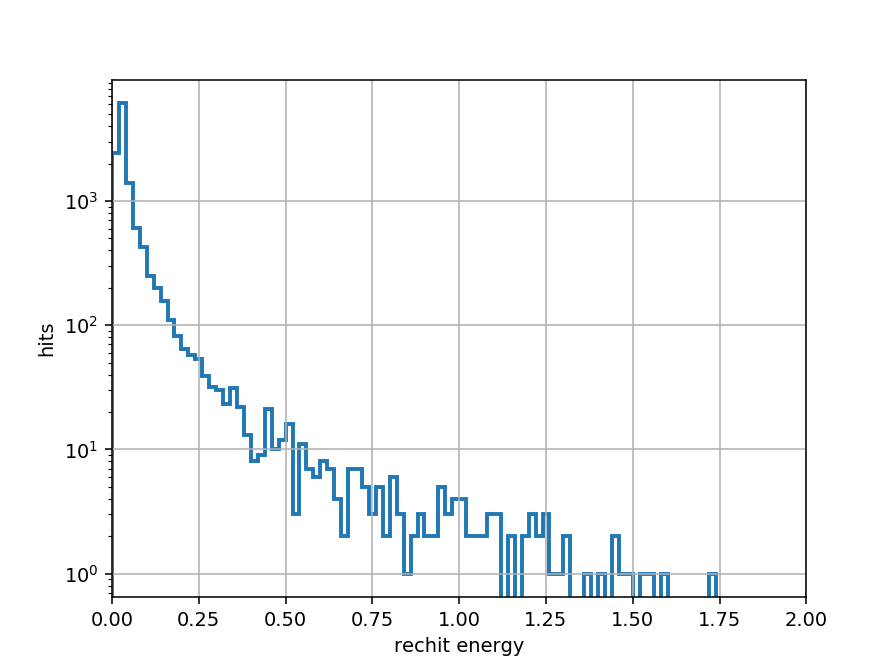

(0.0, 2.0)

In [2]:
event_data = pd.read_csv('data/test.csv')
event_data.hist(column='e', range=(0., 2.), bins=100, histtype='step', lw=2)
plt.yscale('log')
plt.xlabel('rechit energy')
plt.ylabel('hits')
plt.title('')
plt.xlim([0., 2.])

In [18]:
# plot the rechits
sd     = event_data.query('e > 0.1')
cscale = sd.e/(sd.e.max() - sd.e.min())
trace1 = go.Scatter3d(x=sd.x, y=sd.z, z=sd.y, mode='markers',
                      marker=dict(
                      size=1,
                      color=cscale,           # set color to an array/list of desired values
                      colorscale='Inferno_r',   # choose a colorscale
                      reversescale=True,
                      opacity=1.
                      )
                    )


# plot detector elements
theta  = np.linspace(0., 2*np.pi, 13)
r1, r2 = 32.1, 164.5
detz   = np.sort(sd.z.unique())
detz   = detz[np.abs(detz) < 350.]
zz     = [2*[z*np.ones(theta.size),] for z in detz]
X, Y   = [r1*np.cos(theta), r2*np.cos(theta)], [r1*np.sin(theta), r2*np.sin(theta)]
c      = [[0, 'rgb(0, 50, 100)'], [1, 'rgb(0, 50, 100)']]
ee     = [dict(x=X, y=z, z=Y, 
               colorscale = c, 
               showscale  = False, 
               opacity    = 0.3, 
               type       = 'surface') 
          for z in zz]

#trace = go.Scatter3d()
#    x=X, y=zz[0], z=Y,
#    marker=dict(
#        size=4,
#        color='rgb(255,255,255)',
#        #colorscale='Viridis',
#    ),
#    line=dict(
#        color='#1f77b4',
#        width=1
#    )
#)


layout = go.Layout(margin = dict(l=0, r=0, b=0, t=0),
                   scene  = dict(xaxis=dict(title='x (cm)'), 
                                 yaxis=dict(title='z (cm)'), 
                                 zaxis=dict(title='y (cm)')
                                )
                  )
data = ee + [trace1]
fig = dict(data=data, layout=layout)
plotly.iplot(fig, autosize=False, width=1000, height=1000)

The draw time for this plot will be slow for all clients.


<IPython.core.display.Javascript object>


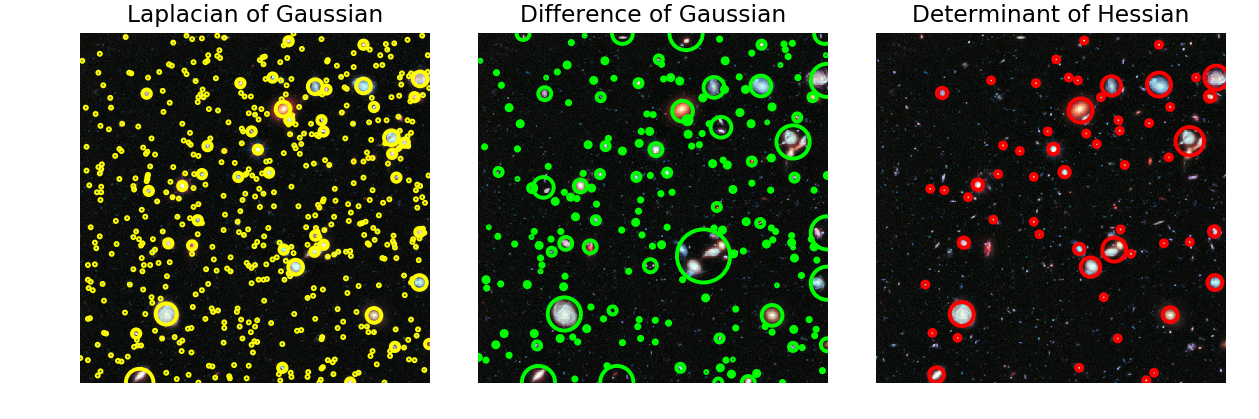

In [16]:
from skimage.feature import blob_doh

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

